In [269]:
import numpy as np

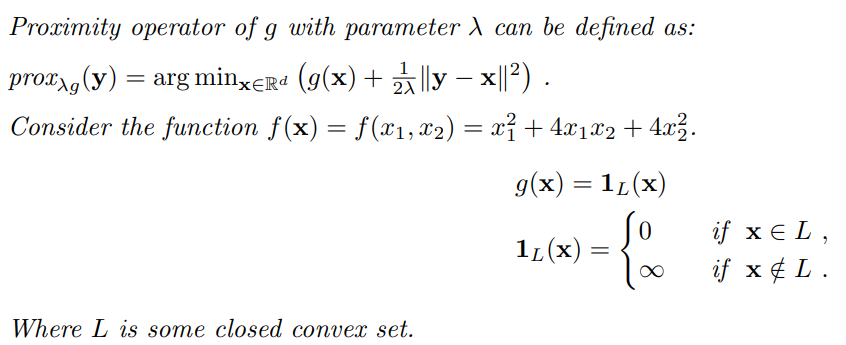

In [270]:
def f(x):
    return x[0]**2 + 4*x[1]*x[0] + 4*x[1]**2

In [271]:
def df_dx(x):
    return np.array([2*x[0]+4*x[1], 8*x[1]+4*x[0]])

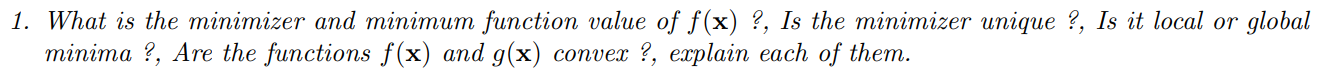

##### f(x) = (x1+2*x2)^2
1. Minimizer: x1+2*x2 = 0 say (0,0) :(Not unique)
2. Minimum function value = 0
3. Convexity:
Hessian = [2 4, 4 8]  
Eigen values are 0 and 2. They are non negative.  
Hence convex.

#### g(x)  
Yes it is convex i suppose as a line joining any points will be greater than or equal to the value of the function at the point.  
This may break when infinities come into arithmtic.  

##### Trying using normal gradient descent

In [272]:
def norm(x):
    sum = 0
    for i in range(len(x)):
        sum += x[i]**2
    # print(sum)
    return np.sqrt(sum)

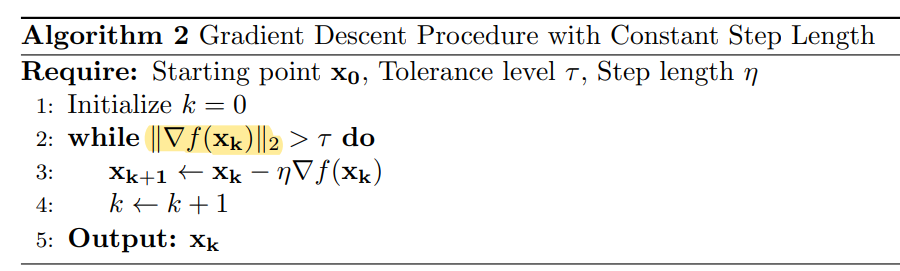

In [273]:
def gradient_descent(f,df_dx,start,tolerance,step_length):
    
    iter = 0
    x = start
    while norm(df_dx(x)) > tolerance:
        # print(norm(df_dx(x)))
        x = x - df_dx(x)*step_length
        iter = iter + 1
    return x,f(x),iter

In [274]:
start = np.array([10,-50])
tolerance = 0.1
step_length = 0.01

x,f_value,iterations = gradient_descent(f,df_dx,start,tolerance,step_length)
print(f"x = {x}\nvalue = {f_value}\niterations = {iterations}")

x = [ 27.99563051 -14.00873898]
value = 0.0004773110737232855
iterations = 79


In [275]:
tolerance_values = np.array([0.1**i for i in range(1,5)])

In [276]:
x_values = []
f_values = []
iterations_values = []

for tolerance in tolerance_values:
    x,f_value,iterations = gradient_descent(f,df_dx,start,tolerance,step_length)
    x_values.append(list(x))
    f_values.append(f_value)
    iterations_values.append(iterations)

##### Constant step length GD

In [277]:
from tabulate import tabulate
table = zip(tolerance_values,x_values,f_values,iterations_values)
headers = ["tolerance_values","Minimizer","Function value","iterations"]
print(tabulate(table,headers=headers,tablefmt="grid"))

+--------------------+-------------------------------------------+------------------+--------------+
|   tolerance_values | Minimizer                                 |   Function value |   iterations |
+====================+===========================================+==================+==============+
|             0.1    | [27.995630509989436, -14.008738980021137] |      0.000477311 |           79 |
+--------------------+-------------------------------------------+------------------+--------------+
|             0.01   | [27.999569705338025, -14.000860589323958] |      4.62884e-06 |          101 |
+--------------------+-------------------------------------------+------------------+--------------+
|             0.001  | [27.99995762583376, -14.0000847483325]    |      4.48892e-08 |          123 |
+--------------------+-------------------------------------------+------------------+--------------+
|             0.0001 | [27.99999582711542, -14.00000834576919]   |      4.35307e-10 |      

##### Conditioned Gradient descend
I take y1 = x1 and y2 = 2*x2  
So, M = [1 0, 0 1/2]  
D = [1 0, 0 1/4]

In [278]:
def gradient_descent_conditioned_1(f,df_dx,start,tolerance,step_length,D):
    
    iter = 0
    x = start
    while norm(df_dx(x)) > tolerance:
        # print(norm(df_dx(x)))
        x = x - np.dot(D,df_dx(x))*step_length
        iter = iter + 1
    return x,f(x),iter

In [279]:
D = np.array([[1,0],[0,0.25]])
start = np.array([10,-50])
tolerance = 0.1
step_length = 0.01

x,f_value,iterations = gradient_descent_conditioned_1(f,df_dx,start,tolerance,step_length,D)
print(f"x = {x}\nvalue = {f_value}\niterations = {iterations}")

x = [ 54.98912213 -27.50543894]
value = 0.00047331263613159535
iterations = 204


In [280]:
x_values = []
f_values = []
iterations_values = []

for tolerance in tolerance_values:
    x,f_value,iterations = gradient_descent_conditioned_1(f,df_dx,start,tolerance,step_length,D)
    x_values.append(list(x))
    f_values.append(f_value)
    iterations_values.append(iterations)

In [281]:
from tabulate import tabulate
table = zip(tolerance_values,x_values,f_values,iterations_values)
headers = ["tolerance_values","Minimizer","Function value","iterations"]
print(tabulate(table,headers=headers,tablefmt="grid"))

+--------------------+------------------------------------------+------------------+--------------+
|   tolerance_values | Minimizer                                |   Function value |   iterations |
+====================+==========================================+==================+==============+
|             0.1    | [54.98912212525269, -27.50543893737364]  |      0.000473313 |          204 |
+--------------------+------------------------------------------+------------------+--------------+
|             0.01   | [54.9988940560834, -27.500552971958285]  |      4.89245e-06 |          260 |
+--------------------+------------------------------------------+------------------+--------------+
|             0.001  | [54.999892057272575, -27.5000539713637]  |      4.66071e-08 |          317 |
+--------------------+------------------------------------------+------------------+--------------+
|             0.0001 | [54.99998902555824, -27.500005487220864] |      4.81123e-10 |          373 |


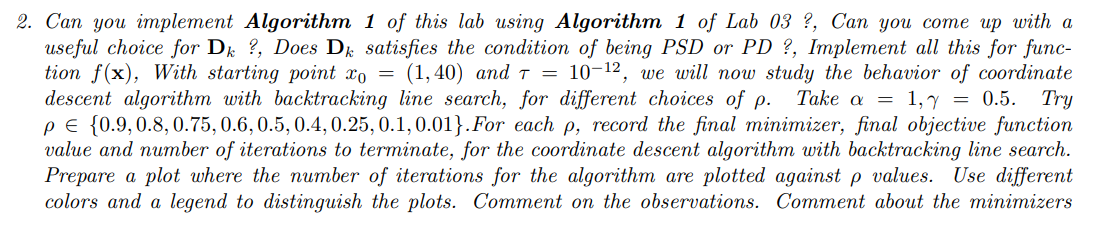

#### coordinate descent with bactracking line search

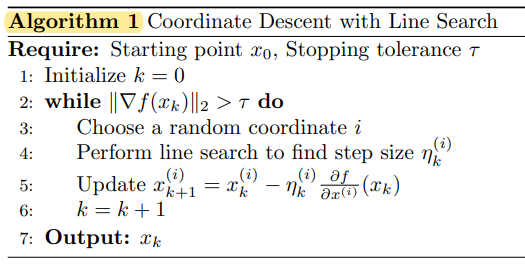

In [282]:
def coordinate_descent_random_with_backtracing_line_search(start_x, f, df_dx, tolerance, rho):

    iter = 0
    x = start_x

    alpha0 = 1
    gamma = 0.5

    history = [[x[0],x[1]]]
    i = 0

    while norm(df_dx(x)) > tolerance:
        # print(f"df_dx: {df_dx(x)}")
        i = i%2
        p = np.zeros(len(x))
        p[i] = -df_dx(x)[i] # descent direction
        # print(f"P descent direction: {p}")
        alpha = alpha0

        while f(x + alpha*p) > f(x) - gamma*alpha*norm(p):
            alpha = alpha*rho
        
        # print(f"Alpha: {alpha}")
        x = x + alpha*p
        # print(f"x: {x}")
        iter += 1
        history.append([x[0],x[1]])
        i = i+1

    return x.tolist(), f(x), iter,history

In [290]:
start = [1,40]
tolerance = 0.1**10
rho_values = [0.5]
# rho_values = [0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1]

minimizer_list = []
function_value_list = []
iterations_list = []
history = []

for rho in rho_values:
    minimizer, function_value,iterations,history =  coordinate_descent_random_with_backtracing_line_search(start_x=start, f=f, df_dx=df_dx, tolerance=tolerance, rho=rho)
    minimizer_list.append(minimizer)
    function_value_list.append(function_value)
    iterations_list.append(iterations)

KeyboardInterrupt: 

In [284]:

table2 = zip(rho_values,minimizer_list,function_value_list,iterations_list)
headers2 = ["Rho","Minimizer","Fucntion Value","Iterations"]
print(tabulate(table2, headers=headers2, tablefmt="grid"))

+-------+---------------+------------------+--------------+
|   Rho | Minimizer     |   Fucntion Value |   Iterations |
+=======+===============+==================+==============+
|   0.5 | [-80.0, 40.0] |                0 |            1 |
+-------+---------------+------------------+--------------+


In [285]:
import matplotlib.pyplot as plt

In [286]:
x_arange = np.arange(-100,100,1)
y_arange = np.arange(-100,100,1)
X,Y = np.meshgrid(x_arange,y_arange)
Z = f([X,Y])

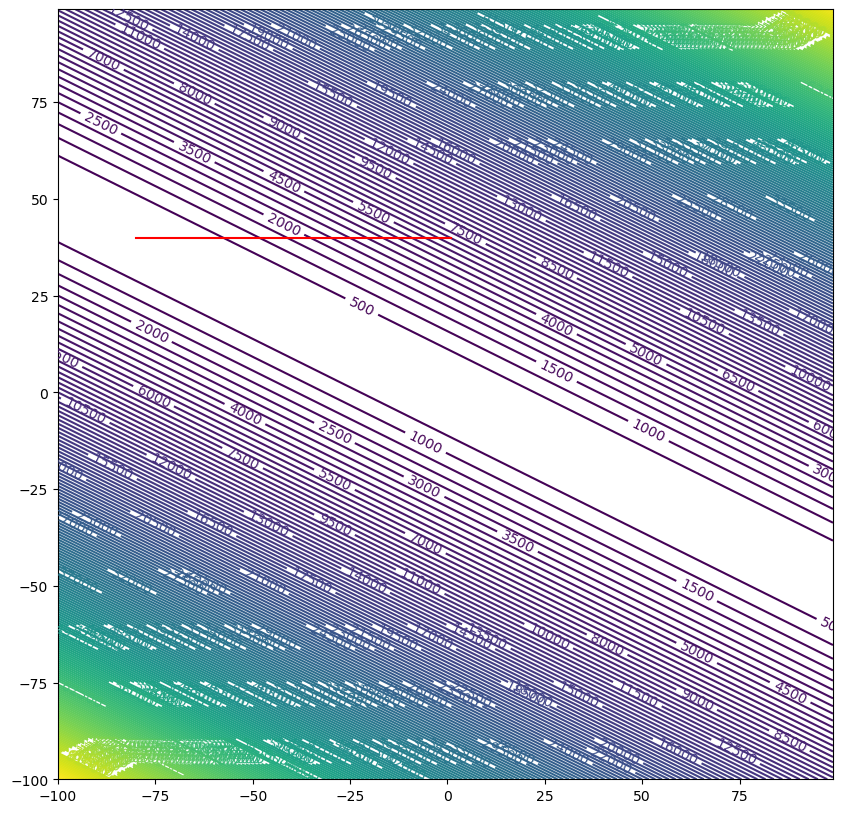

In [287]:
plt.figure(figsize=(10,10))
contour2 = plt.contour(X,Y,Z, levels = 200)
plt.clabel(contour2,inline = True)
plt.plot([x[0] for x in history],[x[1] for x in history], c='r')
plt.show()

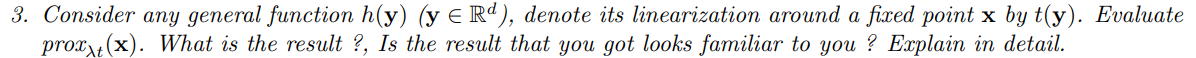

In [288]:
def h(x):
    return 5*np.sin(x[0]) + x[1]**2

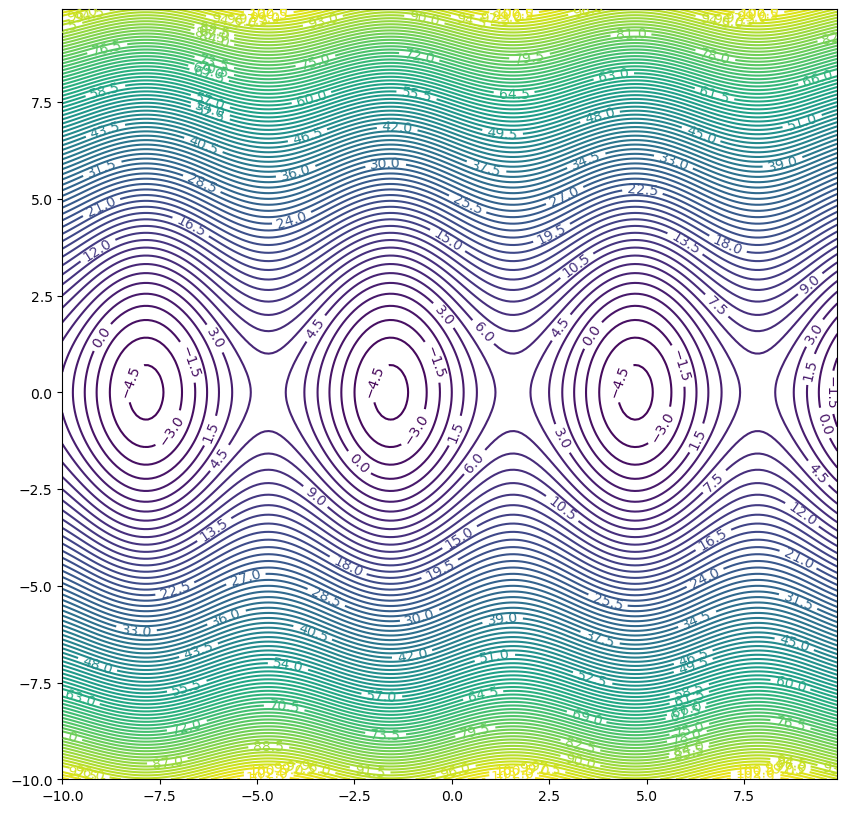

In [289]:
x_arange = np.arange(-10,10,0.1)
y_arange = np.arange(-10,10,0.1)
X,Y = np.meshgrid(x_arange,y_arange)
Z = h([X,Y])
plt.figure(figsize=(10,10))
h_contour = plt.contour(X,Y,Z, levels = 100)
plt.clabel(h_contour, inline = True)
plt.show()